## Programming Exercise 1: Linear Regression
#### Author - Rishabh Jain

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

### 1&nbsp;&nbsp;&nbsp;&nbsp;Simple Octave/MATLAB function
5 X 5 Identity/Diagonal Matrix

In [2]:
A=np.identity(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### 2&nbsp;&nbsp;&nbsp;&nbsp; Linear Regression with one variable

##### Problem Statement
Suppose we are the CEO of a restaurant franchise and are considering differenet cities for opening a new outlet. The chain already has trucks in various cities and we have the data for profits and populations from the cities.we would like to use this data to help us select which city to expand to next.

In [3]:
data=pd.read_csv('./ex1data1.csv')
print(f'TRAINING DATASET SHAPE : {data.shape[0]} X {data.shape[1]}')
data.head()

TRAINING DATASET SHAPE : 97 X 2


,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


#### 2.1 &nbsp;&nbsp;&nbsp;&nbsp;Plotting the data
Before starting on any task it is often useful to understand the data by visualizing it.

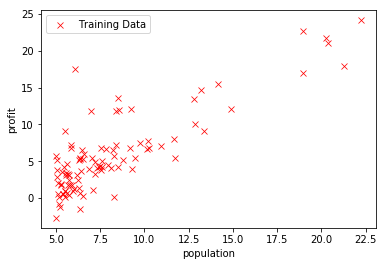

In [4]:
sns.scatterplot(x='population',y='profit',data=data,label='Training Data',color='red',marker='x');

#### 2.2 &nbsp;&nbsp;&nbsp;&nbsp;Gradient Descent

##### 2.2.1&nbsp;&nbsp;&nbsp;&nbsp; Update Equations
**Hypothesis** in Linear Regression is defined by the linear model:

$$ h(x) = \theta^{T}x = \theta_0x_0+\theta_1x_1...\theta_nx_n $$  

The objective of the linear regression is to minimize the error between the actual and the predicted value.So, the **Cost function** is defined as squared error of the difference between the actual and the predicted variable: 

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2} $$  

Recall that the parameters of our model are $\theta_j$ values. These are the values that we will adjust using **Gradient Descent Optimization** alogrithm to minimize the cost $J(\theta)$.

$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta) $$  
$$ \theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} $$  

(simulataneously update $\theta_j$ for all $j$) 
With each step of Gradient Descent, our fitting parameters $\theta_j$ will come close to the optimal values that will achieve the lower cost of $J(\theta)$.

##### Where,
- $ x_n $ are the independent variables.
- $ y $ is our target/dependent variable.
- $ \theta_n $ are the paramerters of our linear model.
- m is the number of training examples.
- n is the number of features.
- $ h(x) $ is our hypothesis.
- $ J(\theta) $ is a cost function.
- $ \alpha $ is the learning rate.


#### 2.2.2&nbsp;&nbsp;&nbsp;&nbsp;Implementation

We will add another dimension to the Design Matrix to accomodate the $\theta_0$ intercept term. We will also initialize the  fitting parameters to 0 and the learning rate alpha to 0.01.

In [5]:
m=data.shape[0]
X=np.ones((m,2))
X[:,1]=data.values[:,0]
X.shape

(97, 2)

In [6]:
y=data.values[:,1]
y=y[:,np.newaxis]
y.shape

(97, 1)

Initializing :
- Hyperparameter alpha 
- Number of iterations
- Fitting Parameters

In [7]:
iterations=1500
alpha=0.01
theta=np.zeros(shape=(1,2))
theta.shape

(1, 2)

#### 2.2.3&nbsp;&nbsp;&nbsp;&nbsp;Computing Cost
Computing cost for X,y with theta initialized to zeros.

In [8]:
def predict(X,theta):
    '''Predicts using the Linear Model'''
    h=np.dot(X,theta.T)
    return h

In [9]:
def computeCost(h,y):
    '''Computes the Least Square cost function'''
    m=y.shape[0]
    J=(1/(2*m))*np.power((h-y),2).sum()
    return J

In [10]:
h=predict(X,theta)
computeCost(h,y)

32.072733877455676

#### 2.2.4&nbsp;&nbsp;&nbsp;&nbsp;Gradient Descent
$J(\theta)$ cost function is parameterized by the vector $\theta$.That is, we minimize the value of $J(\theta)$ by changing the values of vector $\theta$.

In [27]:
def gradientDescent(X,y,theta,alpha,iterations):
    '''Minimizes the cost function using Gradient Descent Optimization Algorithm'''
    m=X.shape[0]
    jHistory=[]
    for i in range(iterations):
        h=predict(X,theta)
        gradient=(alpha/m)*np.dot((h-y).T,X)
        theta=theta-gradient
        J=computeCost(h,y)
        jHistory.append(J)
    return (theta,jHistory)

In [12]:
theta,jHistory=gradientDescent(X,y,theta,alpha,iterations)
theta

array([[-3.63029144,  1.16636235]])

#### 2.3&nbsp;&nbsp;&nbsp;&nbsp;Debugging

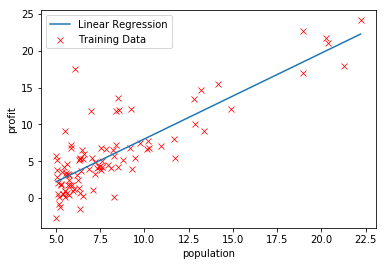

In [13]:
# Predicting
prediction=predict(X,theta)

# Plotting
result=data.copy()
result['profit']=prediction
fig=plt.figure()
sns.scatterplot(x='population',y='profit',data=data,label='Training Data',color='red',marker='x');
sns.lineplot(x='population',y='profit',data=result,label='Linear Regression');

#### 2.4&nbsp;&nbsp;&nbsp;&nbsp;Visualizing $J(\theta)$
Assuming we have implemented the gradient descent correctly, value of $J(\theta)$ should never increase and should converge to a steady value by the end of the iterations.

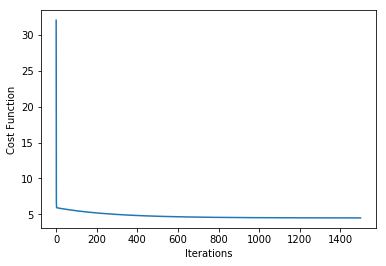

In [14]:
df=pd.DataFrame({'Iterations':range(iterations),'Cost Function':jHistory})
sns.lineplot(data=df,x='Iterations',y='Cost Function');

### 3&nbsp;&nbsp;&nbsp;&nbsp; Linear Regression with multiple variables

##### Problem Statement
In this part, we will implement linear regression with multiple variables to predict the price of houses. Suppose we are selling our house and want to know what a good market price would be. One way is to collect this information on recent houses sold and make a model of housing prices.

In [15]:
data=pd.read_csv('./ex1data2.csv')
print(f'TRAINING DATASET SHAPE : {data.shape[0]} X {data.shape[1]}')
data.head()

TRAINING DATASET SHAPE : 47 X 3


,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


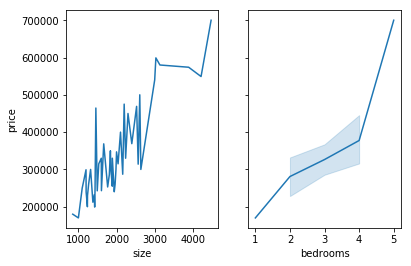

In [17]:
fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True);
sns.lineplot(x='size',y='price',data=data,ax=ax[0]);
sns.lineplot(x='bedrooms',y='price',data=data,ax=ax[1]);

In [18]:
m=data.shape[0]
X=np.ones(shape=(m,3))
X[:,1:]=data.values[:,0:2]
X.shape

(47, 3)

In [19]:
y=data.values[:,2]
y=y[:,np.newaxis]
y.shape

(47, 1)

From the above graph, we can observe that the house prices are positively correlated with house size and number of bedrooms in the house.

#### 3.1&nbsp;&nbsp;&nbsp;&nbsp;Feature Normalization
By looking at the values above, we can notice that the house sizes are about 1000 times the number of bedrooms. When features differ by the order of magnitudes, feature scaling can make convergence much faster.  
$$ X_i=\frac{X_i-\bar{X_i}}{\sigma_i} $$  
(where $i\neq0$, because $X_0=1$ added to accomodate the intercept term)

In [20]:
def featureNormalize(X):
    '''Normalizes the Design Matrix assuming the first column is filled with ones for intrecept term.'''
    X[:,1:]=(X[:,1:]-X[:,1:].mean(axis=0))/X[:,1:].std(axis=0)
    return X

In [21]:
X=featureNormalize(X)
X[1:10]

array([[ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517],
       [ 1.        , -0.01994505,  1.10220517],
       [ 1.        , -0.59358852, -0.22609337],
       [ 1.        , -0.72968575, -0.22609337],
       [ 1.        , -0.78946678, -0.22609337],
       [ 1.        , -0.64446599, -0.22609337]])

#### 3.2&nbsp;&nbsp;&nbsp;&nbsp;Gradient Descent

##### 3.2.1&nbsp;&nbsp;&nbsp;&nbsp;Selecting learning rate($\alpha$)

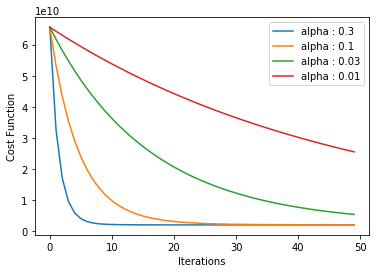

In [22]:
alphas=[0.3,0.1,0.03,0.01]
iterations=50

for alpha in alphas:
    theta=np.zeros(shape=(1,3))
    theta,jHistory=gradientDescent(X,y,theta,alpha,iterations)
    df=pd.DataFrame({'Iterations':range(iterations),'Cost Function':jHistory})
    label=f'alpha : {alpha}'
    sns.lineplot(data=df,x='Iterations',y='Cost Function',label=label);

Choosing a right learning rate($\alpha$ or Step size) is very important. If we choose a very large $\alpha$, instead of converging , gradient descent may diverge. And if we choose a very small $\alpha$, it may take a large number of iterations to converge hence taking a lot of time and computation power.  
From the above graph, we can clearly observer that the gradient descent with $\alpha=0.3$ converges much faster than any other values.

In [23]:
theta=np.zeros(shape=(1,3))
theta,jHistory=gradientDescent(X,y,theta,alpha=0.3,iterations=50)
prediction=predict(X,theta)
result=pd.DataFrame({'Actual Price':y.reshape(m),'Prediction Price':prediction.reshape(m)})
result.head(10)

,Actual Price,Prediction Price
0,399900,356265.623761
1,329900,286134.788608
2,369000,397453.574566
3,232000,269204.539560
4,539900,472269.592312
5,299900,331033.882629
6,314900,276950.988767
7,198999,262062.101145
8,212000,255522.122470
9,242500,271385.049469


#### 3.3&nbsp;&nbsp;&nbsp;&nbsp;Normal Equations
In order to compute the parameters analytically, Normal Equations can be used.

$$ \theta=(X^TX)^{(-1)}X^T\vec{y}$$

PROS :
1. No need to choose $\alpha$.
2. No need to choose the number of iterations and iterate.

CONS : 
1. Need to compute $(X^TX)^{(-1)}$ , which can be computationally expensive for large number of features.

In [24]:
def normalEquation(X,y):
    theta=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

Parameters from Gradient Descent

In [25]:
theta

array([[340412.65345227, 109398.90129361,  -6529.45967813]])

Parameters from Normal Equations

In [26]:
normalEquation(X,y)

array([[340412.65957447],
       [109447.79646964],
       [ -6578.35485416]])

<img src='images/meme.png' width='400' height='400'>